# Principal Component Analysis with Cancer Data

In [117]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

 Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [118]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [119]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt',  header = None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [120]:
df.columns = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class:"]

In [121]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [122]:
df_new = df.iloc[:, 1:11]
df_new

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [123]:
df_new.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class:                          int64
dtype: object

In [124]:
df_new['Bare Nuclei'].apply(str)


0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

In [125]:
df_new.shape

(699, 10)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [126]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [127]:
df_new["Bare Nuclei"] = df_new["Bare Nuclei"].replace('?',0)
df_new["Bare Nuclei"] = df_new["Bare Nuclei"].astype(int)
df_new.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class:                         int64
dtype: object

In [128]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [129]:
df_new["Bare Nuclei"].mode()

0    1
dtype: int32

In [130]:
df_new["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [131]:
# Since "Bare Nuclei" is categorical value by looking at the data,  replacing missing with Mode

In [132]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [133]:
df_new["Bare Nuclei"] = df_new["Bare Nuclei"].replace(0,1)

In [134]:
df_new["Bare Nuclei"].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [135]:
# Check for correlation of variable

In [241]:
df_new.corr(method ='pearson') 

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.426015,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.511989,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.482660,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.473311,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.494865,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.453053,0.818968
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.399128,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.486367,0.712244
Mitoses,0.426015,0.511989,0.482660,0.473311,0.494865,0.453053,0.399128,0.486367,1.000000,0.521653
Class:,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.521653,1.000000


In [242]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [243]:
#Let us check for pair plots

In [244]:
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\vamshidhar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vamshidhar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


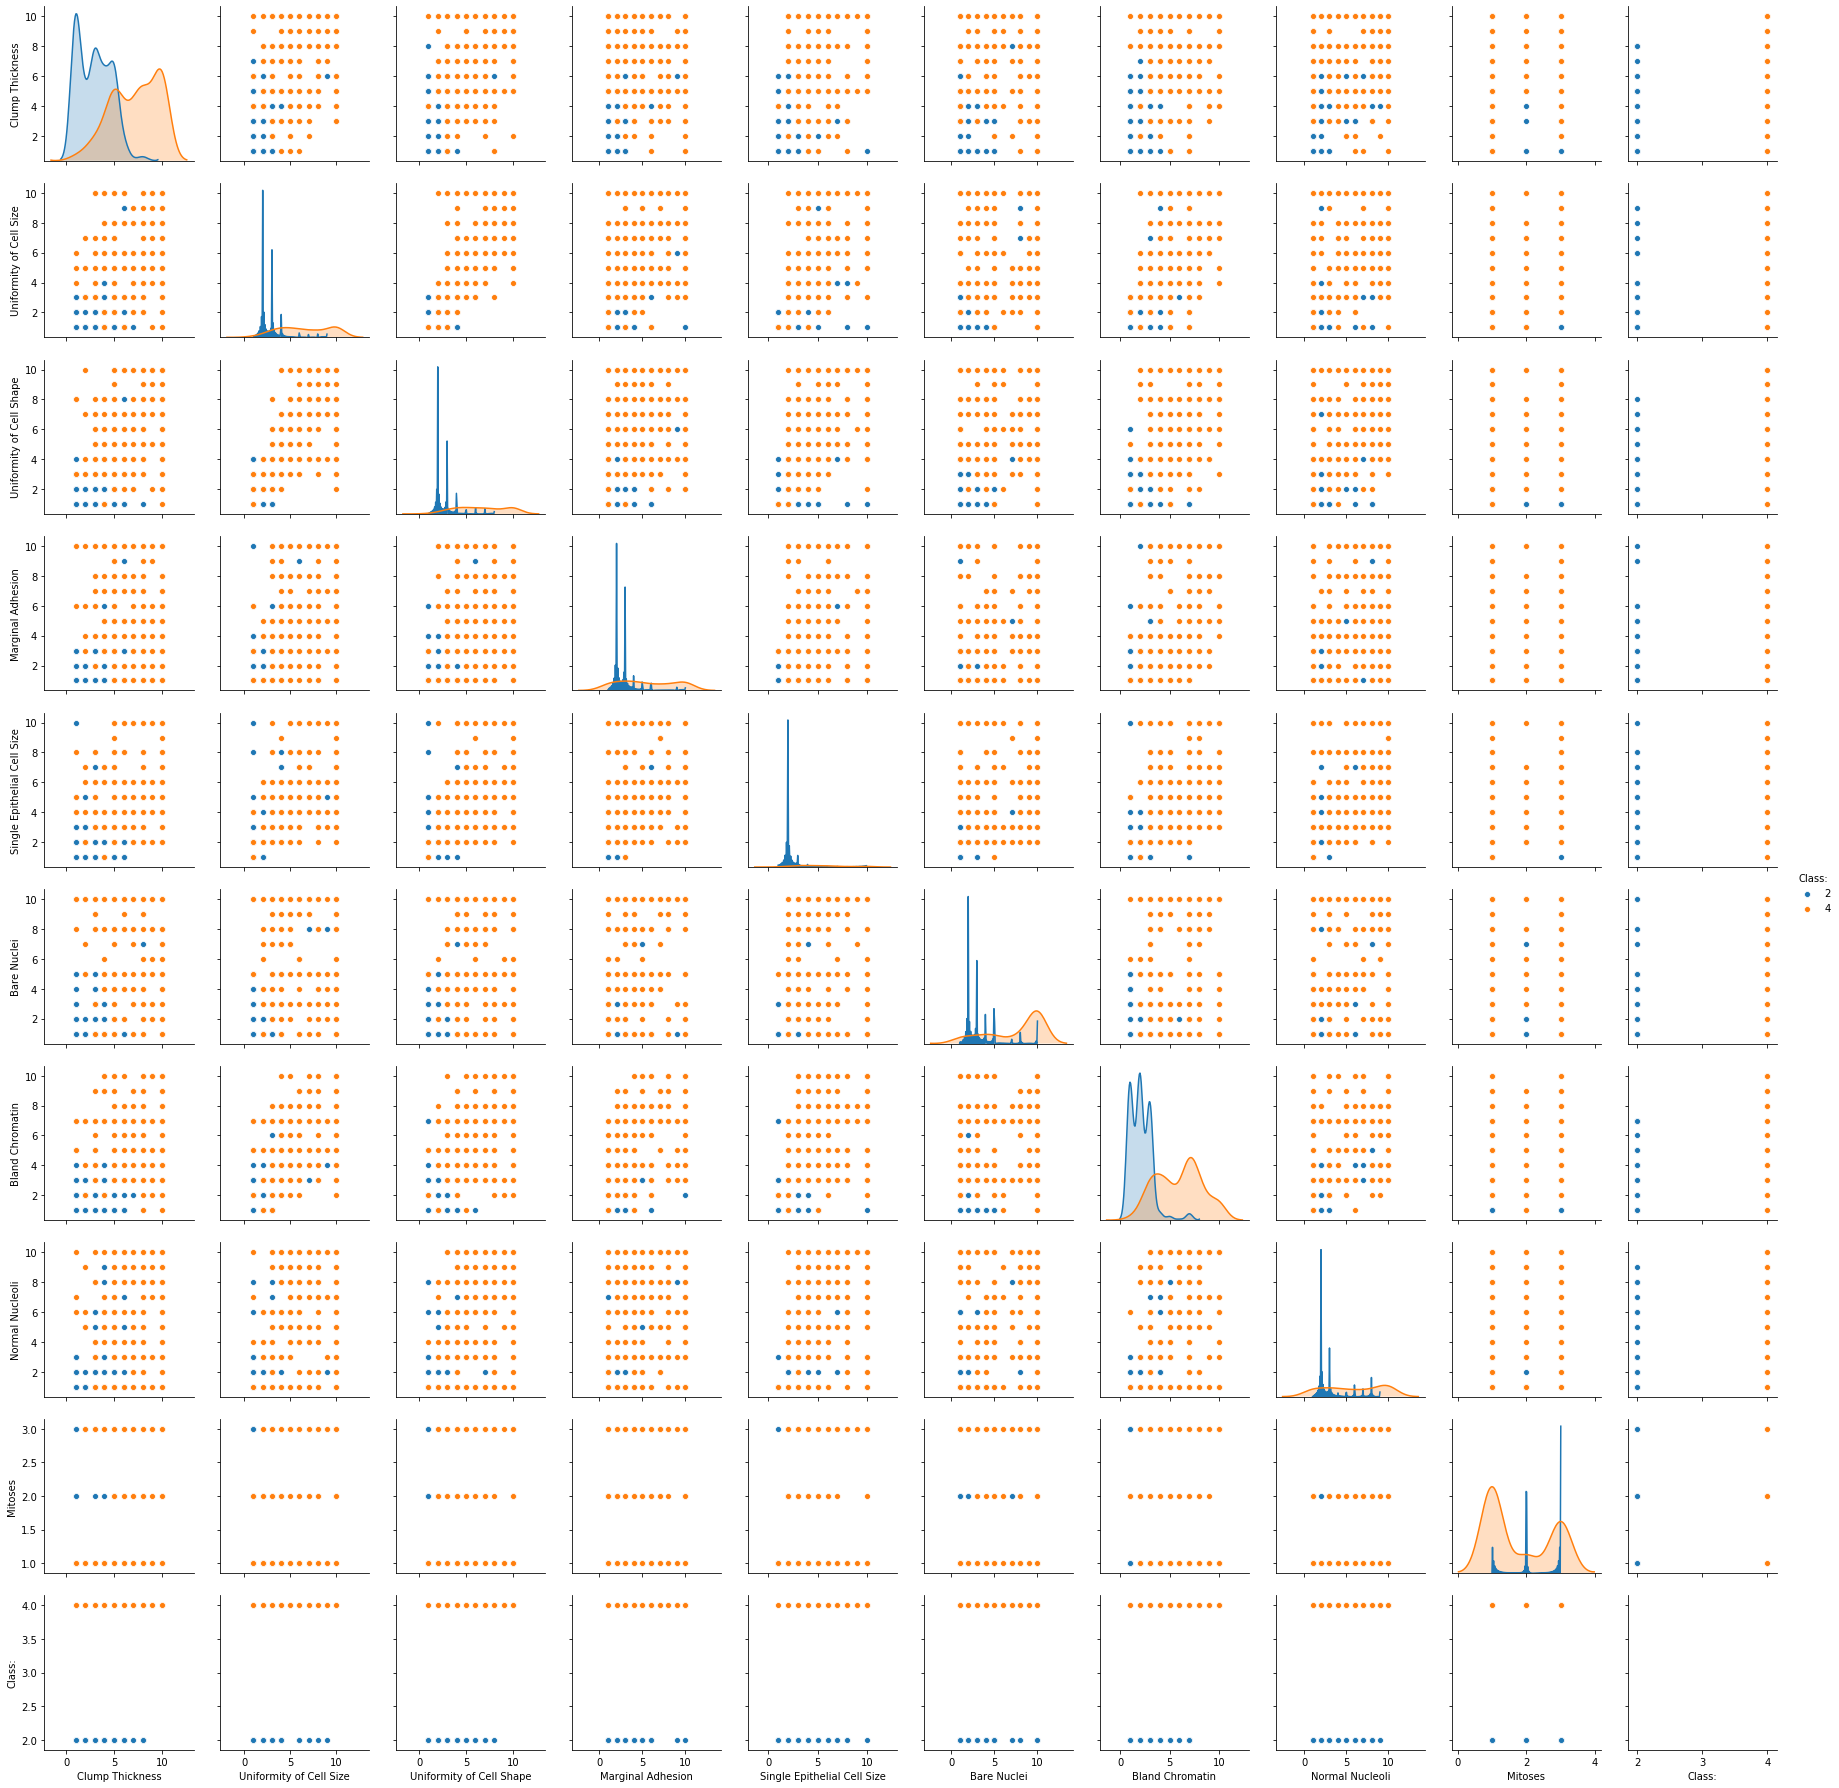

In [245]:
import seaborn as sns
sns.pairplot(df_new, hue='Class:', diag_kind='kde')

In [246]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [247]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.293276,0.671651,1.0,1.0,1.0,1.0,3.0
Class:,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


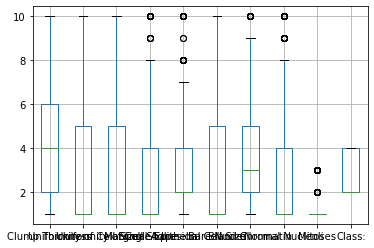

In [248]:
df_new.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002030C7D1188>,
      dtype=object)

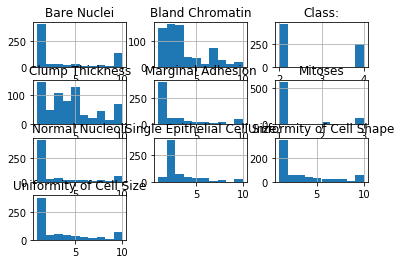

In [249]:
df_new.hist()

In [250]:
pd.crosstab(df_new['Mitoses'],df_new['Class:'] )

Class:,2,4
Mitoses,,
1,445,134
2,8,27
3,5,80


In [153]:
df_new.Mitoses.loc[df_new['Mitoses'] >= 4] = 3


In [154]:
pd.crosstab(df_new['Mitoses'],df_new['Class:'] )

Class:,2,4
Mitoses,,
1,445,134
2,8,27
3,5,80


In [148]:
pd.crosstab(df_new['Clump Thickness'],df_new['Class:'] )

Class:,2,4
Clump Thickness,,
1,142,3
2,46,4
3,96,12
4,68,12
5,85,45
6,16,18
7,1,22
8,4,42
9,0,14


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [149]:
# We could see most of the outliers are now removed.

In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
scaler = StandardScaler()
print(scaler.fit(df_new))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [158]:
print(scaler.mean_)

[4.41773963 3.13447783 3.2074392  2.80686695 3.21602289 3.48640916
 3.43776824 2.86695279 1.29327611 2.68955651]


In [251]:
df_pca = df_new.iloc[:, 1:10]

# Q6 Create a covariance matrix for identifying Principal components

In [151]:
# PCA
# Step 1 - Create covariance matrix

In [193]:
from sklearn.decomposition import PCA

In [203]:
df_pca.cov()

,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
Uniformity of Cell Size,9.311403,8.224213,6.147786,5.079791,7.589223,5.622994,6.735683,1.049330,2.374186
Uniformity of Cell Shape,8.224213,8.832265,5.796568,4.735926,7.615287,5.333128,6.529071,0.963431,2.315207
Marginal Adhesion,6.147786,5.796568,8.153191,3.791065,6.897801,4.641975,5.260800,0.907725,1.892679
Single Epithelial Cell Size,5.079791,4.735926,3.791065,4.903124,4.681307,3.326500,4.252278,0.735982,1.438219
Bare Nuclei,7.589223,7.615287,6.897801,4.681307,13.118368,5.954382,6.357072,1.102129,2.821706
Bland Chromatin,5.622994,5.333128,4.641975,3.326500,5.954382,5.945620,4.958041,0.653664,1.755008
Normal Nucleoli,6.735683,6.529071,5.260800,4.252278,6.357072,4.958041,9.324680,0.997528,2.068952
Mitoses,1.049330,0.963431,0.907725,0.735982,1.102129,0.653664,0.997528,0.451115,0.333296
Class:,2.374186,2.315207,1.892679,1.438219,2.821706,1.755008,2.068952,0.333296,0.904919


# Q7 Identify eigen values and eigen vector

In [152]:
# Step 2- Get eigen values and eigen vector

In [252]:
df_cov=df_pca.cov()

In [253]:
from numpy.linalg import eig

In [254]:
# calculate eigendecomposition
values, vectors = eig(df_cov)

In [255]:
values

array([44.73970714,  5.0973943 ,  0.1564196 ,  0.29979482,  0.8051596 ,
        3.01312268,  3.09638233,  1.7391317 ,  1.99757344])

In [256]:
vectors

array([[-4.21474470e-01, -2.39061784e-01, -5.00806555e-02,
         6.57281849e-02, -7.25049717e-01,  3.85629592e-01,
         1.97445420e-01, -2.07515716e-01, -4.38831132e-02],
       [-4.08311175e-01, -1.81413677e-01, -5.05212207e-02,
        -2.65853408e-02,  6.65425903e-01,  4.15899398e-01,
         9.15204527e-02, -4.13481324e-01, -4.47788850e-02],
       [-3.49984143e-01,  1.25994444e-01,  9.25282446e-04,
         3.71809815e-02,  4.78129571e-02, -6.14174365e-01,
         6.72226256e-01, -1.17495308e-01,  1.22734275e-01],
       [-2.60835737e-01, -1.73648518e-01, -6.22789373e-03,
         6.43771773e-02,  1.25499896e-01,  2.23444070e-01,
         1.15908837e-01,  7.24006471e-01,  5.42521887e-01],
       [-4.60620562e-01,  7.88721796e-01, -9.99822204e-02,
         4.34626731e-02, -5.69438637e-02,  4.93375161e-02,
        -3.65617082e-01, -1.76120983e-02,  1.19156818e-01],
       [-3.06619230e-01, -2.83853014e-02, -5.08349250e-02,
        -4.10077698e-02,  7.65728302e-02, -5.156468

In [257]:
variance = (values/np.sum(values))*(100)

In [258]:
variance.cumsum()

array([ 73.4103502 ,  81.77431869,  82.030977  ,  82.52288998,
        83.84402174,  88.78805033,  93.86869404,  96.72231726,
       100.        ])

In [259]:
pca = PCA()
pca.fit(df_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [260]:
pca.components_

array([[ 4.21474470e-01,  4.08311175e-01,  3.49984143e-01,
         2.60835737e-01,  4.60620562e-01,  3.06619230e-01,
         3.73403268e-01,  5.57378152e-02,  1.28037942e-01],
       [ 2.39061784e-01,  1.81413677e-01, -1.25994444e-01,
         1.73648518e-01, -7.88721796e-01,  2.83853014e-02,
         4.89262155e-01,  1.37055202e-02, -3.81711709e-02],
       [ 1.97445420e-01,  9.15204527e-02,  6.72226256e-01,
         1.15908837e-01, -3.65617082e-01,  2.84253431e-02,
        -5.92637658e-01,  7.29300210e-04, -4.01564320e-02],
       [ 3.85629592e-01,  4.15899398e-01, -6.14174365e-01,
         2.23444070e-01,  4.93375161e-02, -5.15646872e-02,
        -4.94961669e-01, -2.03111315e-02,  2.62183516e-02],
       [ 4.38831132e-02,  4.47788850e-02, -1.22734275e-01,
        -5.42521887e-01, -1.19156818e-01,  8.07625806e-01,
        -1.12573457e-01, -8.57746806e-02,  1.36950255e-02],
       [-2.07515716e-01, -4.13481324e-01, -1.17495308e-01,
         7.24006471e-01, -1.76120983e-02,  4.892068

# Q8 Find variance and cumulative variance by each eigen vector

In [261]:
pca.explained_variance_

array([44.73970714,  5.0973943 ,  3.09638233,  3.01312268,  1.99757344,
        1.7391317 ,  0.8051596 ,  0.29979482,  0.1564196 ])

In [262]:
pca.explained_variance_ratio_

array([0.7341035 , 0.08363968, 0.05080644, 0.04944029, 0.03277683,
       0.02853623, 0.01321132, 0.00491913, 0.00256658])

In [263]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7341035 , 0.81774319, 0.86854962, 0.91798991, 0.95076674,
       0.97930297, 0.99251429, 0.99743342, 1.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [264]:
df_new_pca = pca.transform(df_pca)


In [265]:
df_new_pca.shape

(699, 9)

In [266]:
pca1 = PCA(n_components=5)
pca1.fit(df_pca)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [267]:
df_new_pca_5 = pca1.transform(df_pca)
df_new_pca_5

array([[-4.83178859,  0.16329413,  0.05149281, -0.09132425,  0.85757052],
       [ 4.88067192, -4.82024868,  0.30364824,  0.92286158, -3.26497485],
       [-4.37116803, -0.62542767, -0.31412427, -0.04198674,  0.7384137 ],
       ...,
       [10.76720957,  7.46903248, -1.42624758,  2.42963042,  1.42572017],
       [ 7.12216526,  2.74196035,  0.08242562,  0.43318895,  5.23835498],
       [ 8.26342151,  1.38519567,  1.87325985,  1.91351831,  4.76864668]])

In [268]:
df_new_pca_5.shape

(699, 5)

In [270]:
new_df= pd.DataFrame(pca.components_, columns=["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses"])

# Q10 Find correlation between components and features

In [271]:
new_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.421474,0.408311,0.349984,0.260836,0.460621,0.306619,0.373403,0.055738,0.128038
1,0.239062,0.181414,-0.125994,0.173649,-0.788722,0.028385,0.489262,0.013706,-0.038171
2,0.197445,0.091520,0.672226,0.115909,-0.365617,0.028425,-0.592638,0.000729,-0.040156
3,0.385630,0.415899,-0.614174,0.223444,0.049338,-0.051565,-0.494962,-0.020311,0.026218
4,0.043883,0.044779,-0.122734,-0.542522,-0.119157,0.807626,-0.112573,-0.085775,0.013695
5,-0.207516,-0.413481,-0.117495,0.724006,-0.017612,0.489207,-0.090030,0.014945,-0.004193
6,0.725050,-0.665426,-0.047813,-0.125500,0.056944,-0.076573,0.020327,0.061260,0.014247
7,-0.065728,0.026585,-0.037181,-0.064377,-0.043463,0.041008,-0.052703,0.980173,0.149527
8,0.050081,0.050521,-0.000925,0.006228,0.099982,0.050835,0.031892,0.155625,-0.978306


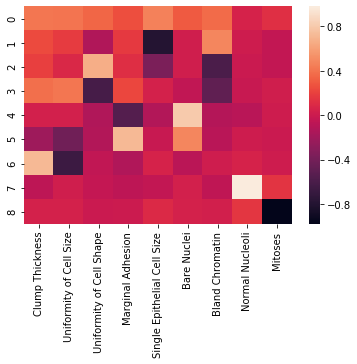

In [274]:
sns.heatmap(new_df)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [298]:
ratings=pd.read_csv("jokes.csv")
ratings

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [299]:
ratings = ratings.iloc[0:200, 1:]

In [300]:
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 Change the column indices from 0 to 99

In [301]:
res=[v for i, v in enumerate(range(100))]
ratings.columns=res

In [302]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [305]:
ratings = ratings.replace(to_replace =99.00, value =0) 

In [306]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [307]:
from sklearn.preprocessing import StandardScaler

In [308]:
scaler = StandardScaler().fit(ratings)
ratings_diff = scaler.transform(ratings)

In [316]:
ratings_diff= pd.DataFrame(ratings_diff)

In [320]:
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [317]:
means = ratings_diff.mean()
means

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
          ...     
95    2.858824e-17
96   -2.137179e-17
97    1.198694e-16
98    1.840889e-16
99    7.549517e-17
Length: 100, dtype: float64

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [321]:
 ratings_diff.mean().sort_values(ascending=False).head(10).index

Int64Index([98, 81, 97, 20, 94, 92, 47, 73, 99, 49], dtype='int64')